Введите количество точек на графике (минимальное количество 30): 40
[[0.49173656 0.10898675]
 [0.03293308 0.02926376]
 [0.31145047 0.4887654 ]
 [0.75846897 0.40413216]
 [0.09973611 0.8010712 ]
 [0.55312433 0.93366313]
 [0.49141285 0.12197506]
 [0.60852836 0.48627537]
 [0.1710297  0.21865804]
 [0.5238252  0.6667285 ]
 [0.49643354 0.07648282]
 [0.76407151 0.89669566]
 [0.99256708 0.20902549]
 [0.24518957 0.4623889 ]
 [0.69558032 0.23875431]
 [0.89611613 0.41624759]
 [0.19461879 0.02003042]
 [0.17459141 0.15870555]
 [0.2716545  0.51681238]
 [0.26231491 0.65702788]
 [0.47674978 0.90944336]
 [0.67290646 0.0583151 ]
 [0.74823816 0.54605187]
 [0.57231104 0.23935741]
 [0.51155626 0.25105238]
 [0.01503833 0.66631135]
 [0.63847439 0.76589282]
 [0.55292967 0.26797476]
 [0.46019559 0.32100324]
 [0.25266765 0.47384708]
 [0.37104518 0.59722104]
 [0.70793966 0.8743062 ]
 [0.14962485 0.64091016]
 [0.51943729 0.23338981]
 [0.86611167 0.21384944]
 [0.47831104 0.13981053]
 [0.23191879 0.27234769]
 [0.260

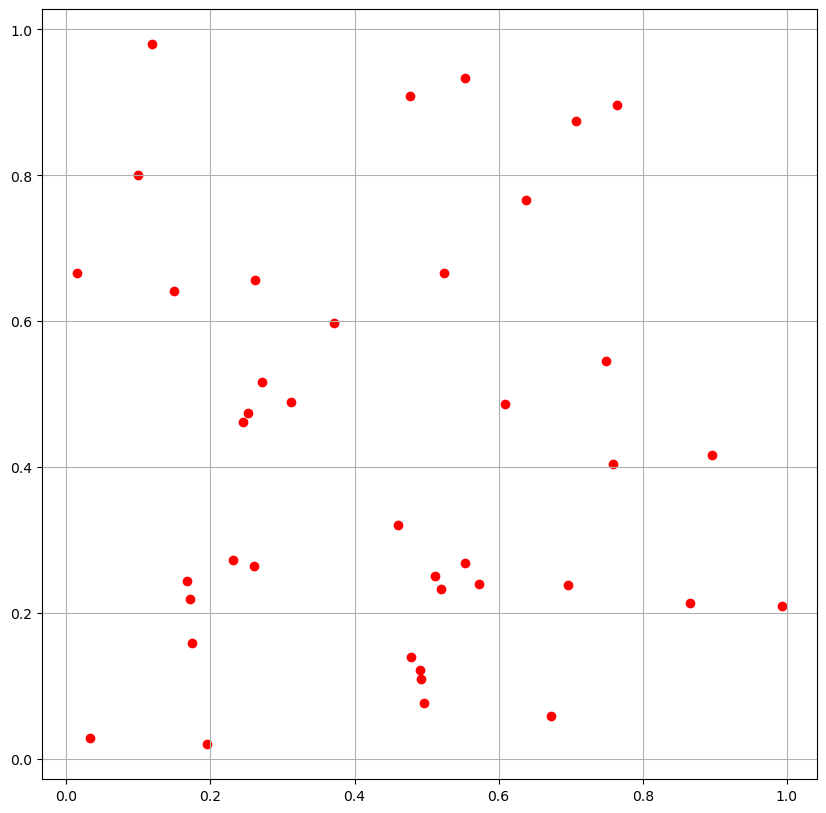

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import math
# Вводим точки напрямую 
col_points = int(input('Введите количество точек на графике (минимальное количество 30): '))
if col_points < 30:
    print('Введено слишком мало точек')
    col_points = 0
# Работаем с точками
array = np.empty((0,2), float)
current_point = 0
array = np.random.uniform(low=0, high=1, size=(40,2))
print(array)
# Выводим точки на график
fig, ax = plt.subplots(figsize=(10,10))
scatter1 = plt.scatter(array[:,0], array[:,1], color='red')
grid1 = plt.grid(True)
plt.show()

In [31]:
# Радиус окружности
radius = float(input('Введите радиус окружности: '))

Введите радиус окружности: 0.4


In [32]:
def display_step(X, centroids, R):
    X = np.array(X)
    centroids = np.array(centroids)
    plt.figure(figsize=(10, 10))
    axes = plt.gca()
    axes.set_xlim([-0.1, 1.1])
    axes.set_ylim([-0.1, 1.1])
    if len(X) > 0:
        plt.title(f'Forel Step {len(centroids)}')
        plt.scatter(X[:, 0], X[:, 1], marker="o", color='purple')
    plt.scatter(centroids[len(centroids)-1, 0], centroids[len(centroids)-1, 1], c='black', s=40)
    axes.add_patch(plt.Circle((centroids[len(centroids)-1, 0], centroids[len(centroids)-1, 1]), R,  color='purple', alpha = 0.05))
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def display(X, centroids, labels, R):
    X = np.array(X)
    centroids = np.array(centroids)
    plt.figure(figsize=(10, 10))
    axes = plt.gca()
    axes.set_xlim([-0.1, 1.1])
    axes.set_ylim([-0.1, 1.1])
    plt.title("FOREL алгоритм")
    count_points = np.array(np.unique(labels, return_counts=True))
    point_in_classter = centroids
    print('Количество классов = ',len(centroids))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='Paired')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c='black', s=60, alpha=0.3)
    for i in range(len(centroids)):  
        axes.add_patch(plt.Circle((centroids[i, 0], centroids[i, 1]), R,  color='purple', alpha = 0.05))
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


def count_labels(cur_data, clusters):
    labels = np.zeros(len(cur_data))
    j = 0
    for c in clusters:
        for k in range(len(cur_data)):
            for el in c:
                if cur_data[k][0] == el[0] and cur_data[k][1] == el[1]:
                     labels[k] = j
        j += 1
    return labels

def cluster(points, radius, tol=1e-3):
    clusters = []
    centroids = []
    while len(points) != 0:
        current_point = get_random_point(points)
        neighbors = get_neighbors(current_point, radius, points)
        centroid = get_centroid(neighbors)
        while np.linalg.norm(current_point - centroid) > tol:
            current_point = centroid
            neighbors = get_neighbors(current_point, radius, points)
            centroid = get_centroid(neighbors)
        centroids.append(current_point)
        clusters.append(neighbors)
#         display_step(neighbors, centroids, radius)
        points = remove_points(neighbors, points)
    return centroids, clusters


def get_neighbors(p, radius, points):
    neighbors = [point for point in points if np.linalg.norm(p - point) < radius]
    return np.array(neighbors)

def get_centroid(points):
    return np.array([np.mean(points[:, 0]), np.mean(points[:, 1])])

def get_random_point(points):
    random_index = np.random.choice(len(points), 1)[0]
    return points[random_index]

def remove_points(subset, points):
    k = 0
    index = []
    for i in range(len(points)):
        for j in range(len(subset)):
            if (points[i][0] == subset[j][0]) and points[i][1] == subset[j][1]:
                index.append(i)
    a = np.delete(points[..., 0], index)
    b = np.delete(points[..., 1], index)
    p = np.c_[a, b]
    return np.array(p)

Количество классов =  5


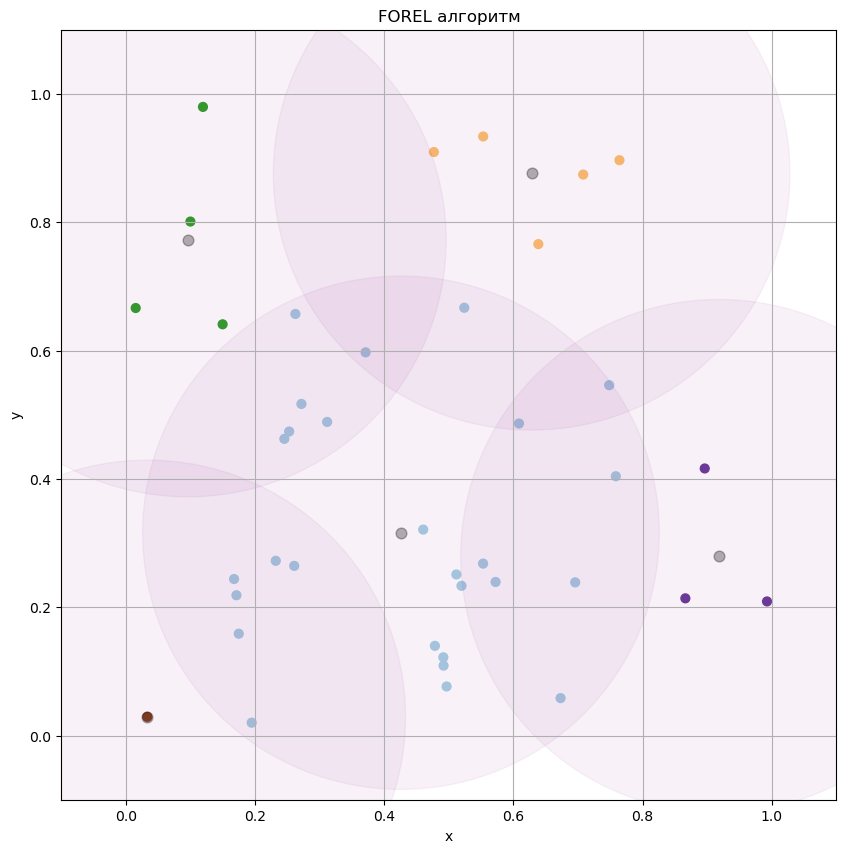

In [33]:
centroids, clusters = cluster(array, radius)
labels = count_labels(array, clusters)
display(array, centroids, labels, radius)